## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## 1.  compute the camera calibration using chessboard images

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

### Computer camera calibration matrix

In [3]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

## 2. use the calibration for new image testing  

test on image file  ../camera_cal\calibration10.jpg


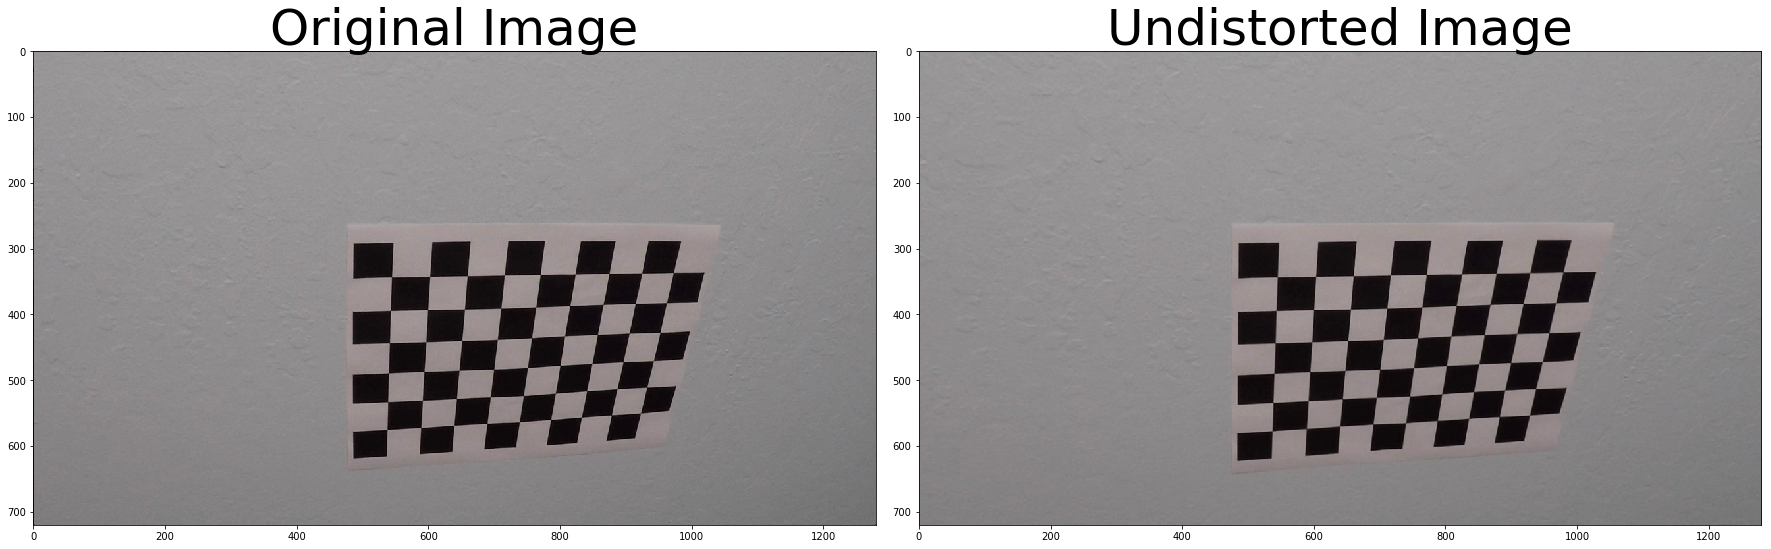

In [26]:
%matplotlib inline
import numpy as np

testidx = np.random.randint(0, len(images))
print('test on image file ', images[testidx])
img = cv2.imread(images[testidx])

dst = cv2.undistort(img, mtx, dist, None, mtx)
# plt.imshow(dst)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## 3 Apply a perspective transform to rectify binary image ("birds-eye view").
find a proper image to do the perspective transform


..\test_images\straight_lines1.jpg


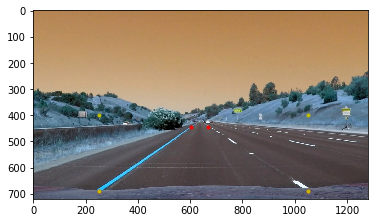

In [39]:
import os
%matplotlib inline
pers_img = os.path.join('..', 'test_images', 'straight_lines1.jpg')
print(pers_img)
img = cv2.imread(pers_img)
plt.imshow(img)
src = np.float32([[605, 444], [670, 444], [1050, 688], [253, 688]])
dst = np.float32([[253, 400], [1050, 400], [1050, 688], [253, 688]])
plt.plot(*src[0], '.', color = 'r')
plt.plot(*src[1], '.', color = 'r')
plt.plot(*src[2], '.', color = 'r')
plt.plot(*src[3], '.', color = 'r')
plt.plot(*dst[0], '.', color = 'y')
plt.plot(*dst[1], '.', color = 'y')
plt.plot(*dst[2], '.', color = 'y')
plt.plot(*dst[3], '.', color = 'y')

# computer the perspective transformation matrix
M = cv2.getPerspectiveTransform(trap_points, warp_points)

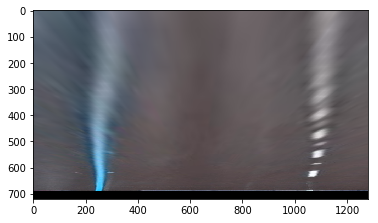

In [41]:
# do transformation on the test image
# check the final warped image after perspective transformation
img_size = img.shape[1], img.shape[0]
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
plt.imshow(warped)

## 4. Use color transforms, gradients, etc., to create a thresholded binary image.
define a function called bin img selection

In [42]:
def build_binary_img(img, rawtype = 'grb', orient = 'x', sobeltype = 's', hls_thresh = (0, 255), sobel_thresh = (0, 255)):
    if rawtype == 'grb': # matplotlib.image.imread()
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        hls = cv2.cvtColor(img, cv2.COLOR_GRB2HLS)
    elif rawtype == 'rbg': # cv2.imread()
        gray = cv2.cvtColor(img, cv2.COLOR_GBR2GRAY)
        hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    else:  # gray
        gray = img

    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    
    channel = gray
    sobelx = Sobel(channel, cv2.CV_64F, 1, 0)
    sobelx = np.absolute(sobelx)
    sobelx = np.uint8(255*sobelx/np.max(sobelx))
    
    sobely = Sobel(channel, cv2.CV_64F, 0, 1)
    sobely = np.absolute(sobely)
    sobely = np.unit8(255*sobely/np.max(sobely))

    thresh = (20, 100)
    sobel_bin = np.zeros_like(sobelx)
    if orient == 'x':
        sobel_bin[(sobelx >= thresh[0]) & (sobelx <= thresh[1])] = 1
    else:
        sobel_bin[(sobely >= thresh[0]) & (sobely <= thresh[1])] = 1
        
    channel = S
    color_bin = np.zeros_like(channel)
    if orient == 'x':
        color_bin[(channel >= thresh[0]) & (channel <= thresh[1])] = 1
    else:
        color_bin[(channel >= thresh[0]) & (channel <= thresh[1])] = 1

    combined_bin = np.zeros_like(gray)
    combined_bin[(color_bin == 1) | (sobel_bin == 1)] = 1

    return sobel_bin, color_bin, combined_bin


Advanced Lane Finding Project
Advanced Lane Finding Project
The goals / steps of this project are the following:
Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
Apply a distortion correction to raw images.
Use color transforms, gradients, etc., to create a thresholded binary image.
Apply a perspective transform to rectify binary image ("birds-eye view").
Detect lane pixels and fit to find the lane boundary.
Determine the curvature of the lane and vehicle position with respect to center.
Warp the detected lane boundaries back onto the original image.
Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.
The goals / steps of this project are the following:
Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
Apply a distortion correction to raw images.
Use color transforms, gradients, etc., to create a thresholded binary image.
Apply a perspective transform to rectify binary image ("birds-eye view").
Detect lane pixels and fit to find the lane boundary.
Determine the curvature of the lane and vehicle position with respect to center.
Warp the detected lane boundaries back onto the original image.
Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.